__Perform Principal component analysis and perform clustering using first 3 principal component scores 
(both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with 
the original data 
(class column we have ignored at the begining who shows it has 3 clusters)__


In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sns

In [2]:
df_wine = pd.read_csv("wine.csv")
df_wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


# __PCA__

In [4]:
data = df_wine.iloc[:, 1:]

# Converting into numpy array
arr_wine = data.values
arr_wine

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
#normalizing data
wine_normal = scale(arr_wine)
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [6]:
pca = PCA()
pca_wine = pca.fit_transform(wine_normal)

In [7]:
pca_wine

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [8]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [9]:
# Cumulative variance 
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

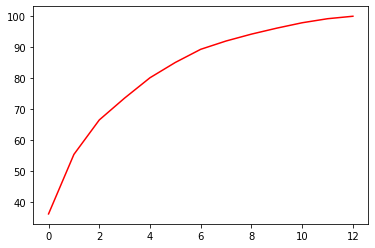

In [10]:
# Variance plot for PCA components obtained 
plt.plot(var1, color="red")

In [11]:
#create data frame from pca1 and pca2

df_winePCA = pd.concat([pd.DataFrame(pca_wine[:, 0:3], columns=['pc1','pc2', 'pc3']), df_wine[['Type']]], axis = 1)
df_winePCA

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


In [12]:
df_winePCA['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

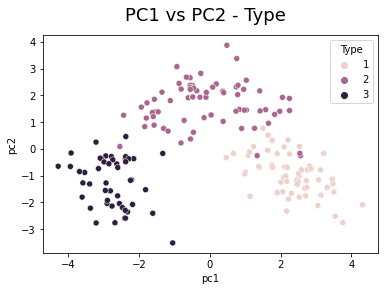

In [13]:
plt.suptitle('PC1 vs PC2 - Type', size=18)
sns.scatterplot(data=df_winePCA, x='pc1', y='pc2', hue='Type')

# CLUSTERING

__clustering on data frame with PCA1, PCA2 and PCA3__

__Hierarchical Clustering__

In [14]:
# import libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [31]:
# Dataset contains first 3 PCA's

df_wine_3pca = pd.DataFrame(pca_wine[:, 0:3], columns=['pc1','pc2', 'pc3'])
df_wine_3pca

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


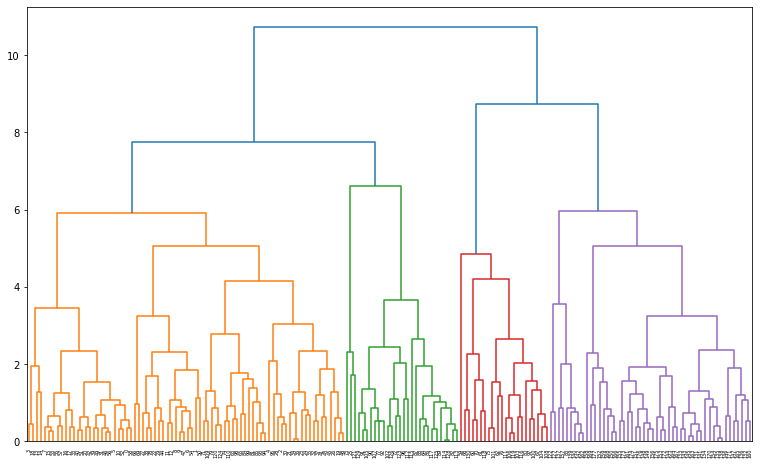

In [32]:
# Dendogram from first 3 PCA's, df_wine_3pca

plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(df_wine_3pca, 'complete'))

In [36]:
# Create clusters, Hierarchical on 3 PC dataset

cluster_hie = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

y_hc = cluster_hie.fit_predict(df_wine_3pca)
Clust = pd.DataFrame(y_hc, columns=['Clusters'])

df_wine_hie3pc = df_wine_3pca.copy()
df_wine_hie3pc['h_clusterid'] = Clust.Clusters

df_wine_hie3pc

,pc1,pc2,pc3,h_clusterid
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1
174,-2.601956,-1.757229,0.207581,1
175,-2.677839,-2.760899,-0.940942,1
176,-2.387017,-2.297347,-0.550696,1


In [37]:
# Clusters, with number of records

df_wine_hie3pc['h_clusterid'].value_counts()

0    66
2    65
1    47
Name: h_clusterid, dtype: int64

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

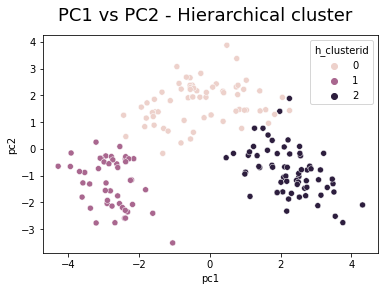

In [39]:
plt.suptitle('PC1 vs PC2 - Hierarchical cluster', size=18)
sns.scatterplot(data=df_wine_hie3pc, x='pc1', y='pc2', hue='h_clusterid')

## K-MEANS CLUSTERING on first 3 PCA

In [41]:
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


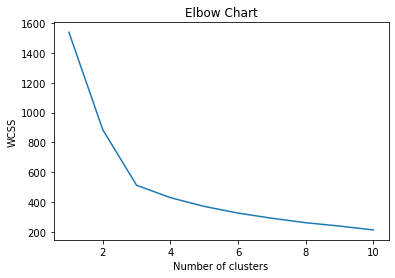

In [42]:
# Finding optimum number of cluster, from Elbow chart

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_wine_3pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Chart')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### create clusters, k-means, k=3

In [43]:
# Create clusters using k-means(k=3) for first 3 PC's (df_wine_3pca)

clusters_km = KMeans(3, random_state=42)
clusters_km.fit(df_wine_3pca)

KMeans(n_clusters=3, random_state=42)

In [44]:
df_wine_km3pc = df_wine_3pca.copy()
df_wine_km3pc['clusterid_km'] = clusters_km.labels_
df_wine_km3pc

,pc1,pc2,pc3,clusterid_km
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


In [45]:
# Clusters, with number of records

df_wine_km3pc['clusterid_km'].value_counts()

2    65
1    62
0    51
Name: clusterid_km, dtype: int64

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

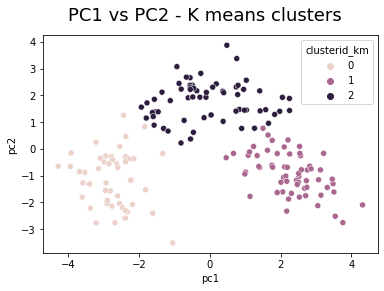

In [46]:
plt.suptitle('PC1 vs PC2 - K means clusters', size=18)
sns.scatterplot(data=df_wine_km3pc, x='pc1', y='pc2', hue='clusterid_km')